In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df.Gender.value_counts().sum()

10000

In [19]:
df.Tenure

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64

In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [22]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

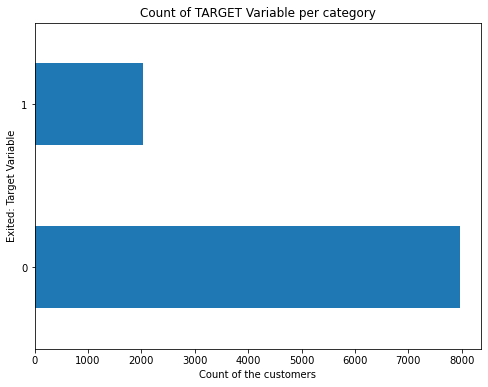

In [23]:
df['Exited'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of the customers")
plt.ylabel("Exited: Target Variable")
plt.title("Count of TARGET Variable per category");

In [24]:
100*df['Exited'].value_counts()/len(df['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

In [25]:
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.groupby('Balance').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Balance,,,,,,,,,,,,,
0.00,3617,3617,3617,3617,3617,3617,3617,3617,3617,3617,3617,3617,3617
3768.69,1,1,1,1,1,1,1,1,1,1,1,1,1
12459.19,1,1,1,1,1,1,1,1,1,1,1,1,1
14262.80,1,1,1,1,1,1,1,1,1,1,1,1,1
16893.59,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216109.88,1,1,1,1,1,1,1,1,1,1,1,1,1
221532.80,1,1,1,1,1,1,1,1,1,1,1,1,1
222267.63,1,1,1,1,1,1,1,1,1,1,1,1,1


In [47]:
df.groupby('Geography').count()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [57]:
df.groupby('Age').count()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,,,
18,22,22,22,22,22,22,22,22,22,22
19,27,27,27,27,27,27,27,27,27,27
20,40,40,40,40,40,40,40,40,40,40
21,53,53,53,53,53,53,53,53,53,53
22,84,84,84,84,84,84,84,84,84,84
...,...,...,...,...,...,...,...,...,...,...
83,1,1,1,1,1,1,1,1,1,1
84,2,2,2,2,2,2,2,2,2,2
85,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

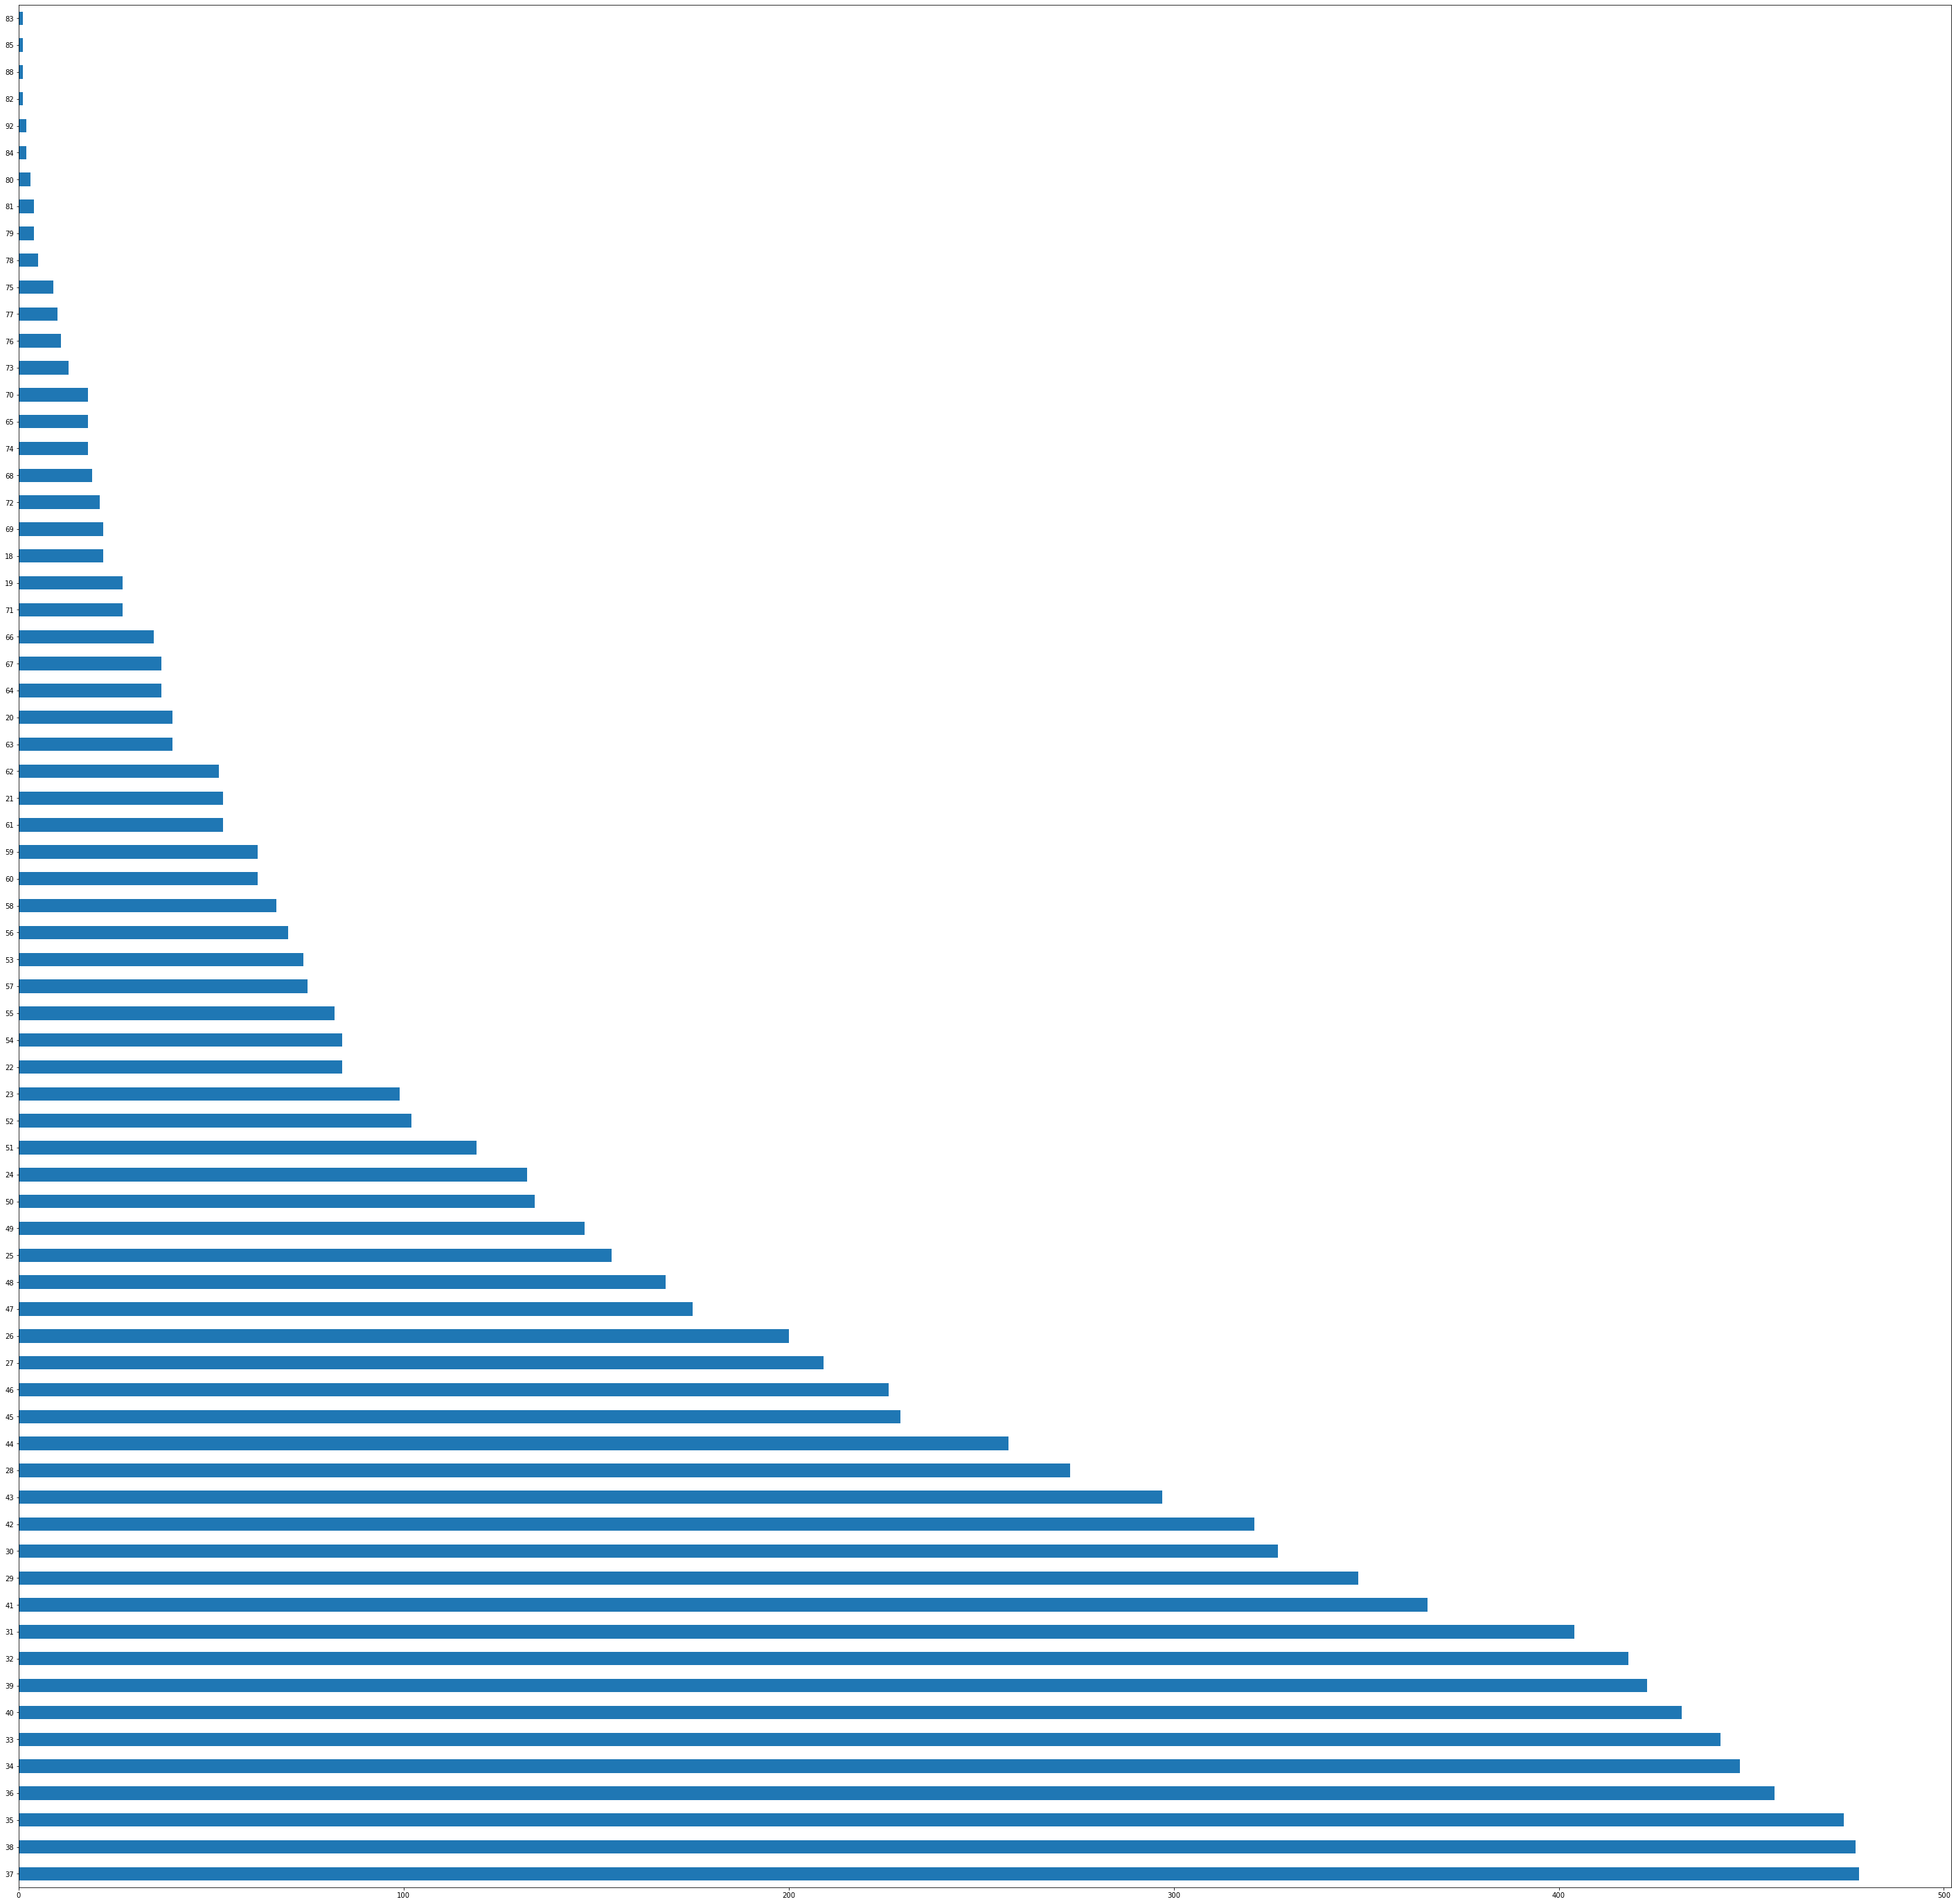

In [58]:
df.Age.value_counts().plot(kind='barh', figsize=(50,50))

In [59]:
#get max age
print(df['Age'].max())

92


<AxesSubplot:>

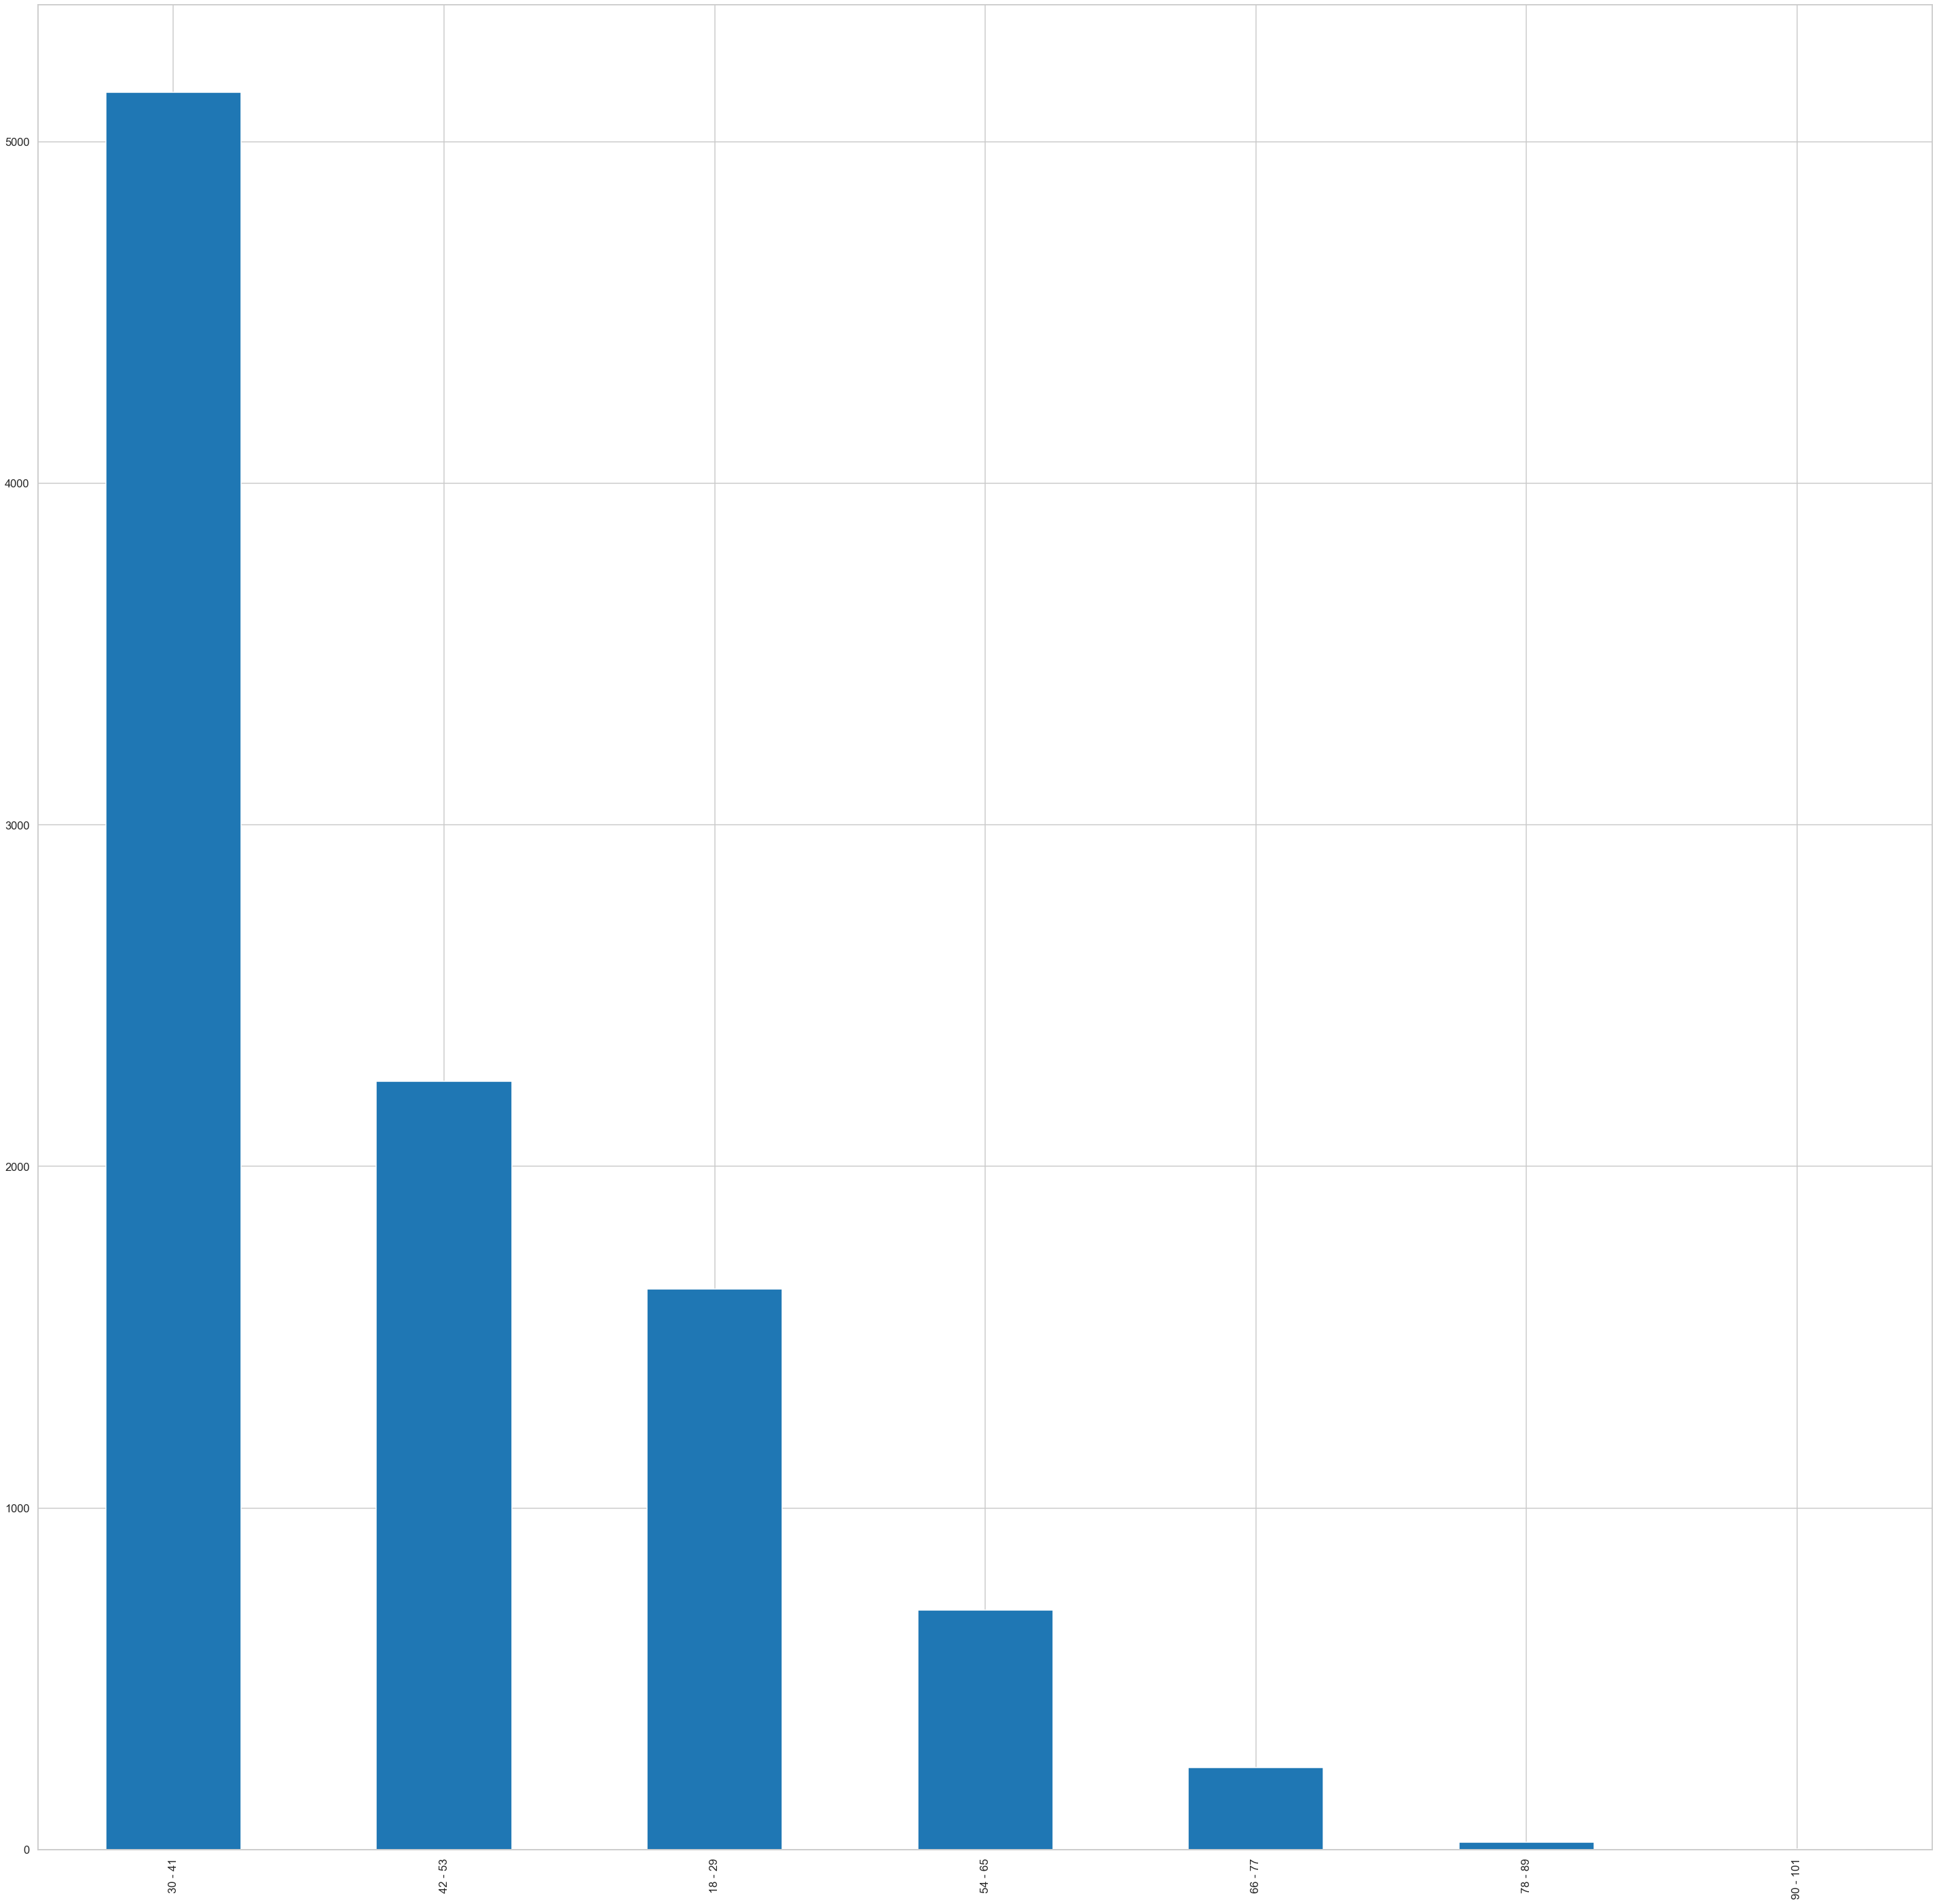

In [95]:
df.Age.value_counts().plot(kind='bar', figsize=(50,50))

In [39]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0, 0.5, 'Tenure')

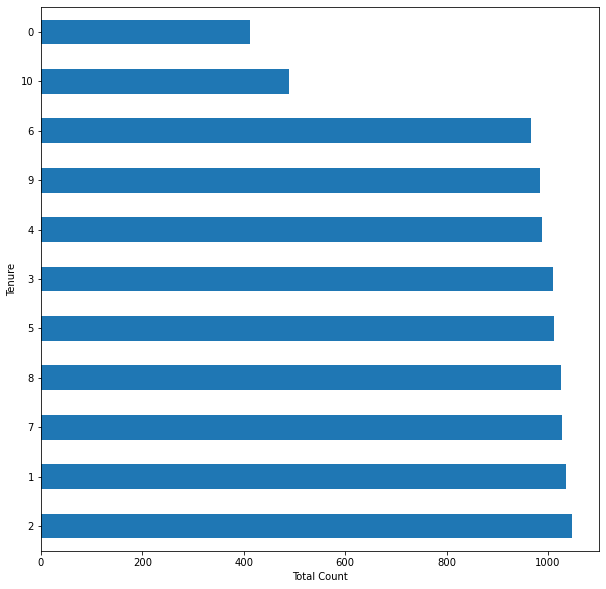

In [46]:
#univariate analysis
df.Tenure.value_counts().plot(kind='barh', figsize=(10,10))
plt.xlabel('Total Count')
plt.ylabel('Tenure')

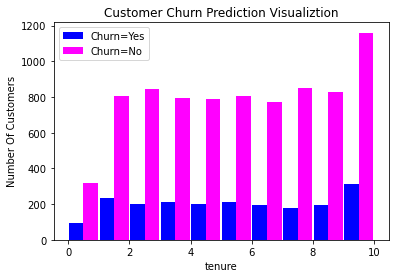

In [43]:

tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','magenta'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [48]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [84]:
#One Hot encoding
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42 - 53,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,30 - 41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42 - 53,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,30 - 41,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,42 - 53,2,125510.82,1,1,1,79084.10,0,0,0,1


Text(0.5, 1.0, 'Balance by churn')

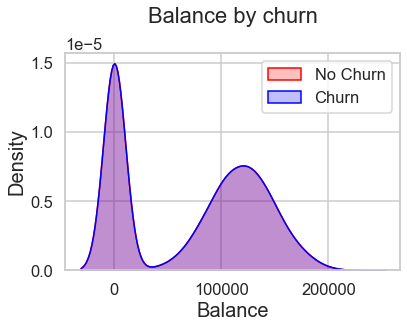

In [85]:
Mth = sns.kdeplot(df1.Balance[(df1["Exited"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df1.Balance[(df1["Exited"] == 0) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Balance')
Mth.set_title('Balance by churn')

In [86]:
df1.corr()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780
Gender,-0.002857,1.000000,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889
Tenure,0.000842,0.014733,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868
Balance,0.006268,0.012087,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
Exited,-0.027094,-0.106512,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667
Geography_France,-0.008928,0.006772,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418


In [87]:
df1.corr()['Exited'].sort_values(ascending = False)

Exited               1.000000
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

<AxesSubplot:>

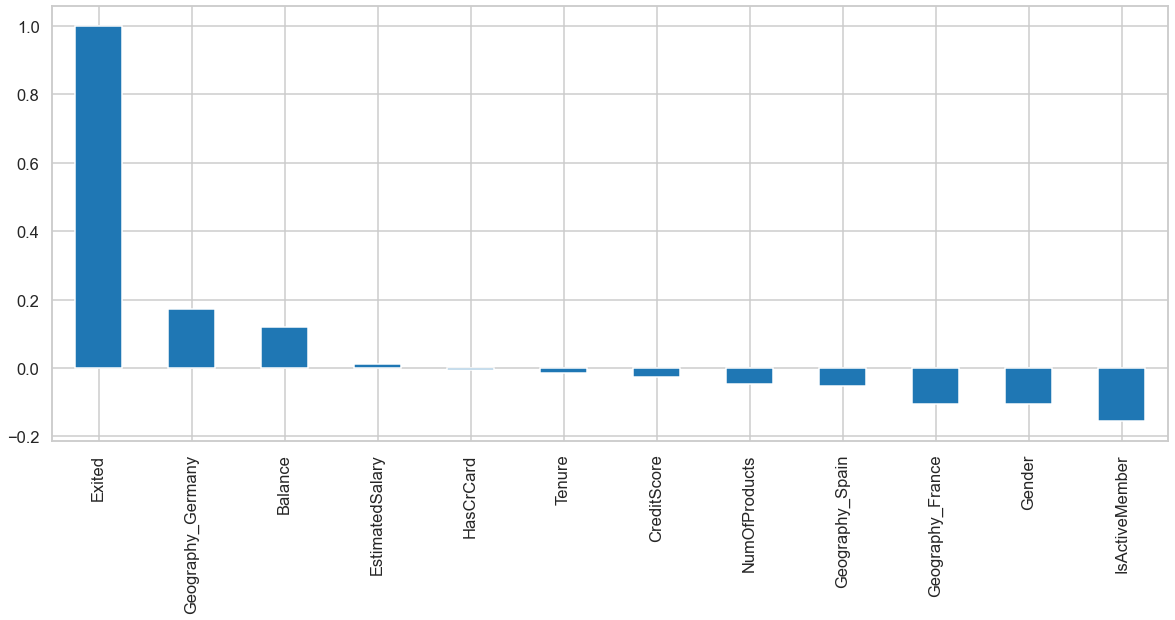

In [88]:
plt.figure(figsize=(20,8))
df1.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

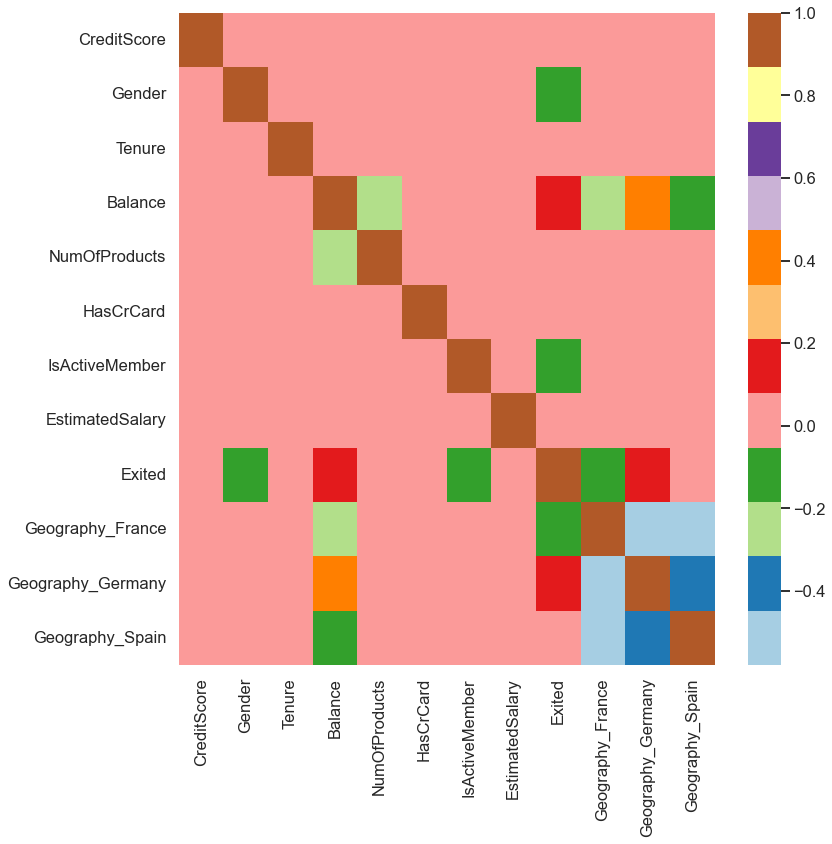

In [89]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), cmap="Paired")

In [90]:
#bivariate analysis
new_df1_target0=df1.loc[df1["Exited"]==0]
new_df1_target1=df1.loc[df1["Exited"]==1]

In [91]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

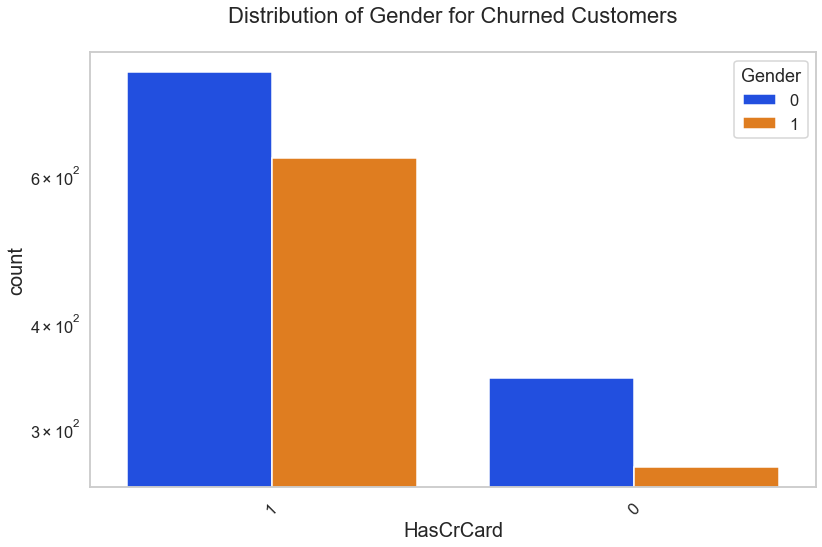

In [92]:
uniplot(new_df1_target1,col='HasCrCard',title='Distribution of Gender for Churned Customers',hue='Gender')

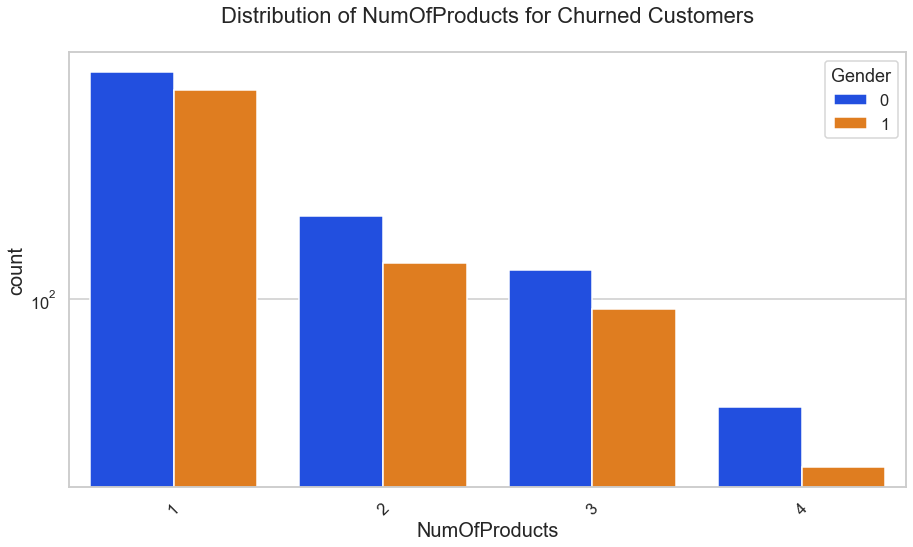

In [93]:
uniplot(new_df1_target1,col='NumOfProducts',title='Distribution of NumOfProducts for Churned Customers',hue='Gender')

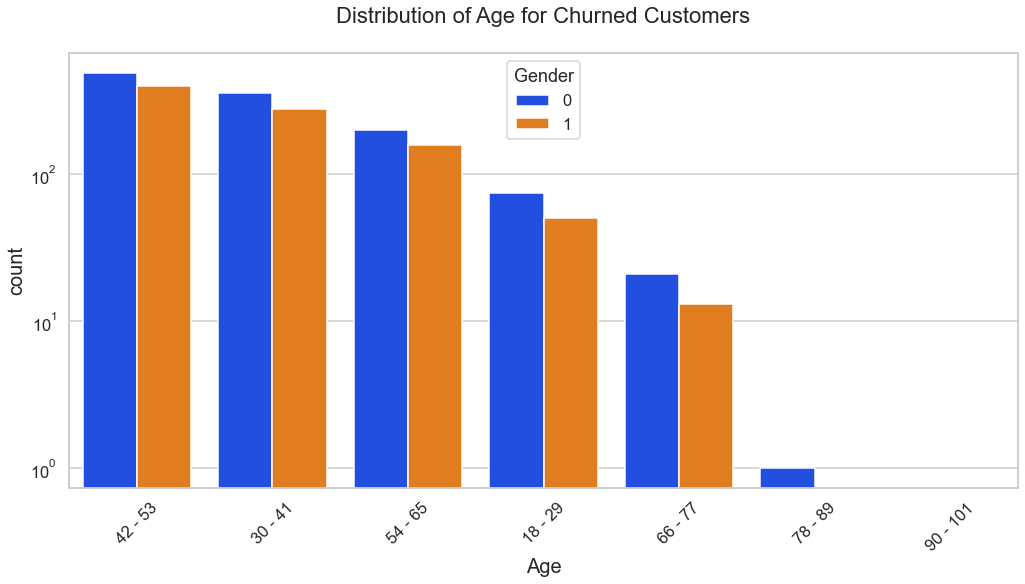

In [97]:
uniplot(new_df1_target1,col='Age',title='Distribution of Age for Churned Customers',hue='Gender')